## Research of prices volatility between ETH-BTC pair

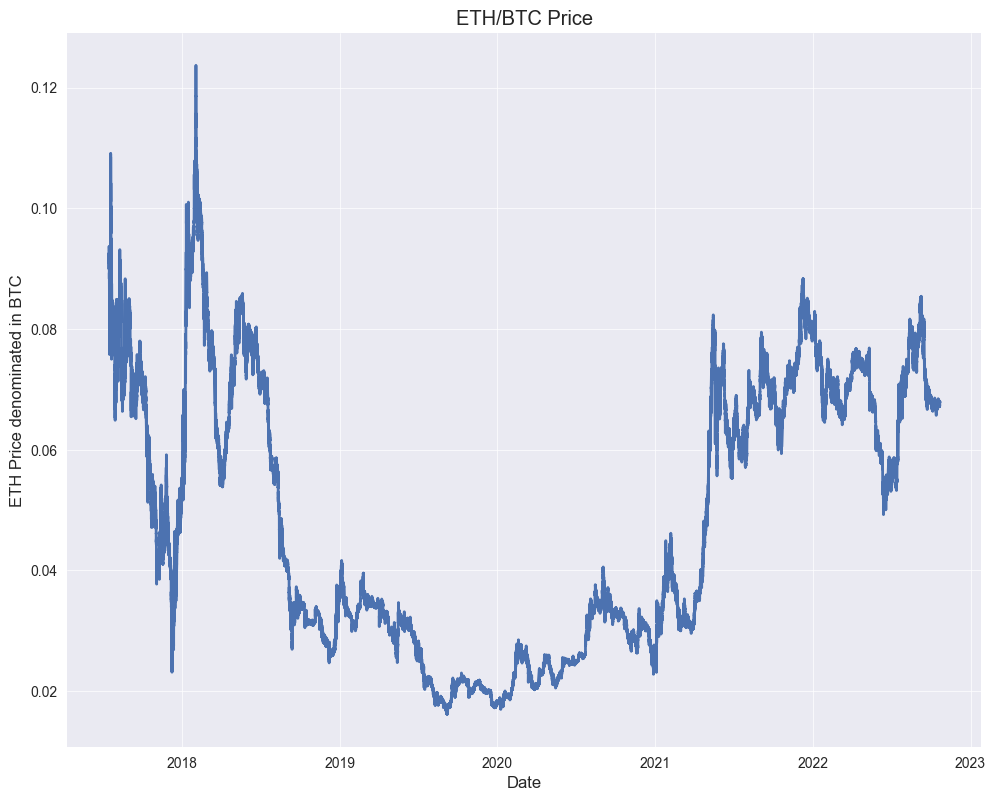

In [123]:
from datetime import date
from math import sqrt

import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import HTML
from IPython.core.display_functions import display

plt.style.use('seaborn-darkgrid')
pd.set_option('display.max_rows', 500)

df_ethbtc = pd.read_parquet("ETH-BTC.parquet")
# Remove 14th of July because data is not complete for this day
df_ethbtc=df_ethbtc[df_ethbtc.index.date != date(year=2017, month=7, day=14)]
fig, ax = plt.subplots()
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(10)

line = ax.plot(df_ethbtc.reset_index()['open_time'].tolist(), df_ethbtc['close'].tolist())
ax.set_title('ETH/BTC Price')
ax.set_ylabel('ETH Price denominated in BTC')
ax.set_xlabel('Date')
plt.show()

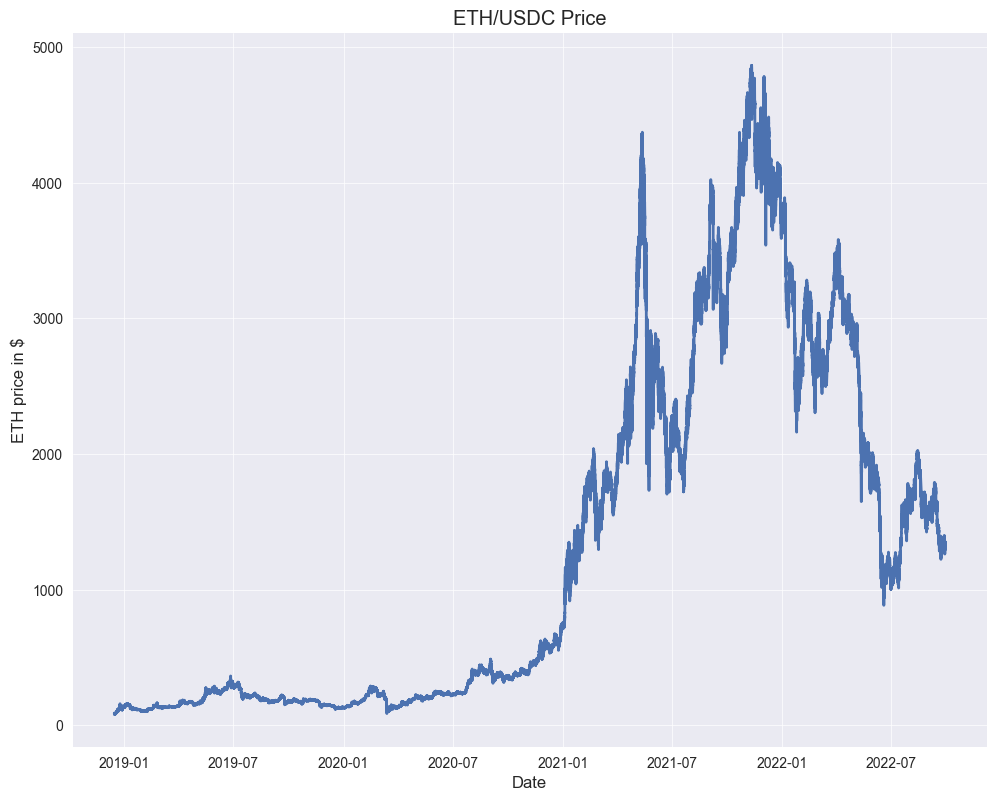

In [124]:
df_ethusdc = pd.read_parquet("ETH-USDC.parquet")

fig, ax = plt.subplots()
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(10)

line_usd = ax.plot(df_ethusdc.reset_index()['open_time'].tolist(), df_ethusdc['close'].tolist())
ax.set_title('ETH/USDC Price')
ax.set_ylabel('ETH price in $')
ax.set_xlabel('Date')
plt.show()

## Calculating Volatility

### Daily volatility formula is

> √(∑ (Pav – Pi)^2 / n)

Where `Pav` is overall mean price
`Pi` is daily asset price(assume it's mean daily price)
`n` - number of price points overall

To find out annualized volatility:
> √X * √(∑ (Pav – Pi)2 / n)

Where X is amount of days in period

## ETH-BTC Pair

In [125]:
TABLE_HEADERS = ["Daily Volatility", "Entire Period Volatility"]
# Calculate overall mean price
mean_price_overall_ethbtc = sum(df_ethbtc['close'].tolist()) / len(df_ethbtc)
# Group by dates
df_daily_prices = df_ethbtc.groupby([df_ethbtc.index.date])['close']
squared_deviations = []
for ix, value in df_daily_prices:
    pav_minus_pi_squared = (mean_price_overall_ethbtc - value.mean()) ** 2
    squared_deviations.append(pav_minus_pi_squared)
# √(∑ (Pav – Pi)^2
variance = sum(squared_deviations) / len(df_daily_prices)
daily_volatility = sqrt(variance)
# √X * √(∑ (Pav – Pi)2 / n)
overall_volatility = daily_volatility * sqrt(len(df_daily_prices))

dataframe = pd.DataFrame(data=[[daily_volatility, overall_volatility]], columns=TABLE_HEADERS)
display(HTML(dataframe.to_html(index=False)))

Daily Volatility,Entire Period Volatility
0.022472,0.985952


## ETH-USDC Pair

In [129]:
# Calculate overall mean price
mean_price_overall_ethusdc = sum(df_ethusdc['close'].tolist()) / len(df_ethusdc)
df_daily_prices = df_ethusdc.groupby([df_ethusdc.index.date])['close']
count_prices_per_day = df_ethusdc.groupby([df_ethusdc.index.date])['close'].count()[0]
squared_deviations = []
for ix, value in df_daily_prices:
    pav_minus_pi_squared = (mean_price_overall_ethusdc - value.mean()) ** 2
    squared_deviations.append(pav_minus_pi_squared)
variance = sum(squared_deviations) / len(df_daily_prices)
daily_volatility = sqrt(variance)
# √X * √(∑ (Pav – Pi)2 / n)
overall_volatility = daily_volatility * sqrt(len(df_daily_prices))
dataframe = pd.DataFrame(data=[[daily_volatility, overall_volatility]], columns=TABLE_HEADERS)
display(HTML(dataframe.to_html(index=False)))

2018-12-15
2018-12-16
2018-12-17
2018-12-18
2018-12-19
2018-12-20
2018-12-21
2018-12-22
2018-12-23
2018-12-24
2018-12-25
2018-12-26
2018-12-27
2018-12-28
2018-12-29
2018-12-30
2018-12-31
2019-01-01
2019-01-02
2019-01-03
2019-01-04
2019-01-05
2019-01-06
2019-01-07
2019-01-08
2019-01-09
2019-01-10
2019-01-11
2019-01-12
2019-01-13
2019-01-14
2019-01-15
2019-01-16
2019-01-17
2019-01-18
2019-01-19
2019-01-20
2019-01-21
2019-01-22
2019-01-23
2019-01-24
2019-01-25
2019-01-26
2019-01-27
2019-01-28
2019-01-29
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-03
2019-02-04
2019-02-05
2019-02-06
2019-02-07
2019-02-08
2019-02-09
2019-02-10
2019-02-11
2019-02-12
2019-02-13
2019-02-14
2019-02-15
2019-02-16
2019-02-17
2019-02-18
2019-02-19
2019-02-20
2019-02-21
2019-02-22
2019-02-23
2019-02-24
2019-02-25
2019-02-26
2019-02-27
2019-02-28
2019-03-01
2019-03-02
2019-03-03
2019-03-04
2019-03-05
2019-03-06
2019-03-07
2019-03-08
2019-03-09
2019-03-10
2019-03-11
2019-03-12
2019-03-13
2019-03-14
2019-03-15

Daily Volatility,Entire Period Volatility
1321.136919,49166.887449
